In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [10]:
groceries = pd.read_excel('final_data.xlsx')
groceries

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,NO.TRANSAKSI,DATE,DESCRIPTION_CLEANED,QTY
0,2301011000001,2023-01-01,MADU NSTR SUPER 650ML,1
1,2301011000001,2023-01-01,STELLA MTC F,1
2,2301011000001,2023-01-01,GELAS KOPI BOLA 50,2
3,2301011000001,2023-01-01,MIKA BX IV,3
4,2301011000002,2023-01-01,LAGIE GOLD CM 75G W,2
...,...,...,...,...
21929,2312311020099,2023-12-31,INDOMIE SOTO MIE,1
21930,2312311020099,2023-12-31,INDOMIE KARI AYAM,1
21931,2312311020099,2023-12-31,INDOMIE KALDU AYAM,3
21932,2312311020099,2023-12-31,SEDAAP MIE KOREAN SPCY40,1


In [11]:
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NO.TRANSAKSI         21934 non-null  int64         
 1   DATE                 21934 non-null  datetime64[ns]
 2   DESCRIPTION_CLEANED  21934 non-null  object        
 3   QTY                  21934 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 685.6+ KB


In [12]:
#Renaming the columns to simple words
groceries.rename(columns = {'NO.TRANSAKSI':'id','DESCRIPTION_CLEANED':'item'}, inplace = True)

In [13]:
#Creating temporary data which has quantity purchased column
temp=groceries.copy()
temp['qty_purchased']=groceries['id'].map(groceries['id'].value_counts())
temp

,id,DATE,item,QTY,qty_purchased
0,2301011000001,2023-01-01,MADU NSTR SUPER 650ML,1,4
1,2301011000001,2023-01-01,STELLA MTC F,1,4
2,2301011000001,2023-01-01,GELAS KOPI BOLA 50,2,4
3,2301011000001,2023-01-01,MIKA BX IV,3,4
4,2301011000002,2023-01-01,LAGIE GOLD CM 75G W,2,2
...,...,...,...,...,...
21929,2312311020099,2023-12-31,INDOMIE SOTO MIE,1,6
21930,2312311020099,2023-12-31,INDOMIE KARI AYAM,1,6
21931,2312311020099,2023-12-31,INDOMIE KALDU AYAM,3,6
21932,2312311020099,2023-12-31,SEDAAP MIE KOREAN SPCY40,1,6


In [14]:
#Creating sparse matrix 
basket = (temp.groupby(['id', 'item'])['qty_purchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id'))

#Eoding the quantity urchased
def encode(x):
    '''Encoding the quantity of products with 0s and 1s
    0:when qty is less than or equal to 0
    1:when qty is greater than or equal to 1'''
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#Appying on our data
basket_sets = basket.applymap(encode)
basket_sets

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16552\492910806.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode)


item,3M MASKER RESPIRATOR 1,ABC ALK A2 2 LR06 2B 1B,ABC ALK LR03 4B 2B,ABC ALK LR06 2B MP,ABC ALK LR06 4B 2R9,ABC ALKALINE A2 4 LR6,ABC ALKALINE A3 2 LR03,ABC BAT BIRU CZ R20,ABC BAT BIRU R14 2,ABC BAT BIRU R6 12,...,ZWITSAL BB MYK TLON 250ML,ZWITSAL BB NAT M TELON 60ML,ZWITSAL COL FLO KISS 100,ZWITSAL EAU DE TOILETTE 100,ZWITSAL H,ZWITSAL HAIR LOT ALMD 100ML,ZWITSAL SHP ALOE 100ML,ZWITSAL SOAP 4X70G,ZWITSAL SOAP CLSS 70G,ZWITSAL SOAP R
id,,,,,,,,,,,,,,,,,,,,,
2301011000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312311020095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True, low_memory=True)

#Associaton rules-using lift
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets))
rules

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(HIT MAT 48 6 GREEN),(INDOMIE GRG SPECIAL),0.001407,0.048959,0.001125,0.800000,16.340230,1.0,0.001057,4.755205,0.940124,0.022857,0.789704,0.411494
1,(NUTRIJELL LCI 10G),(NUTRIJELL CKL 20G),0.001407,0.003939,0.001407,1.000000,253.857143,1.0,0.001401,inf,0.997464,0.357143,1.000000,0.678571
2,(NUTRIJELL LCI 10G),(NUTRIJELL GRP 10G),0.001407,0.002814,0.001407,1.000000,355.400000,1.0,0.001403,inf,0.998591,0.500000,1.000000,0.750000
3,(OOPS RSC 10G),(OOPS BCT 10G),0.001970,0.003658,0.001688,0.857143,234.329670,1.0,0.001681,6.974395,0.997698,0.428571,0.856618,0.659341
4,(POPMIE BASO SAPI 35G),(POPMIE MINI SOTO 35G),0.001407,0.001688,0.001125,0.800000,473.866667,1.0,0.001123,4.991559,0.999296,0.571429,0.799662,0.733333
5,"(INDOMIE GORENG ACEH, INDOMIE AYAM BAWANG)",(INDOMIE GRG SPECIAL),0.001688,0.048959,0.001407,0.833333,17.021073,1.0,0.001324,5.706246,0.942841,0.028571,0.824753,0.431034
6,"(INDOMIE GORENG ACEH, INDOMIE SEBLAK HOT)",(INDOMIE GRG KEBAB RDG),0.001407,0.004502,0.001125,0.800000,177.700000,1.0,0.001119,4.977490,0.995773,0.235294,0.799096,0.525000
7,"(INDOMIE GRG KEBAB RDG, INDOMIE SEBLAK HOT)",(INDOMIE GORENG ACEH),0.001125,0.011818,0.001125,1.000000,84.619048,1.0,0.001112,inf,0.989296,0.095238,1.000000,0.547619
8,"(INDOMIE SOTO MIE, KAPAL GARAM 250G)",(INDOMIE GRG SPECIAL),0.001125,0.048959,0.001125,1.000000,20.425287,1.0,0.001070,inf,0.952113,0.022989,1.000000,0.511494
9,"(INDOMIE SOTO MIE, TELOR HORN)",(INDOMIE GRG SPECIAL),0.001407,0.048959,0.001125,0.800000,16.340230,1.0,0.001057,4.755205,0.940124,0.022857,0.789704,0.411494


In [19]:
#Customizable function to change the lift and confidence
def rules_mod(lift,confidence):
    '''rules_mod is a function to control the rules 
    based on lift and confidence threshold'''
    return rules[ (rules['lift'] >= lift) &
      (rules['confidence'] >= confidence) ]

#Calling function
rules_mod(1, 0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(HIT MAT 48 6 GREEN),(INDOMIE GRG SPECIAL),0.001407,0.048959,0.001125,0.800000,16.340230,1.0,0.001057,4.755205,0.940124,0.022857,0.789704,0.411494
1,(NUTRIJELL LCI 10G),(NUTRIJELL CKL 20G),0.001407,0.003939,0.001407,1.000000,253.857143,1.0,0.001401,inf,0.997464,0.357143,1.000000,0.678571
2,(NUTRIJELL LCI 10G),(NUTRIJELL GRP 10G),0.001407,0.002814,0.001407,1.000000,355.400000,1.0,0.001403,inf,0.998591,0.500000,1.000000,0.750000
3,(OOPS RSC 10G),(OOPS BCT 10G),0.001970,0.003658,0.001688,0.857143,234.329670,1.0,0.001681,6.974395,0.997698,0.428571,0.856618,0.659341
4,(POPMIE BASO SAPI 35G),(POPMIE MINI SOTO 35G),0.001407,0.001688,0.001125,0.800000,473.866667,1.0,0.001123,4.991559,0.999296,0.571429,0.799662,0.733333
5,"(INDOMIE GORENG ACEH, INDOMIE AYAM BAWANG)",(INDOMIE GRG SPECIAL),0.001688,0.048959,0.001407,0.833333,17.021073,1.0,0.001324,5.706246,0.942841,0.028571,0.824753,0.431034
6,"(INDOMIE GORENG ACEH, INDOMIE SEBLAK HOT)",(INDOMIE GRG KEBAB RDG),0.001407,0.004502,0.001125,0.800000,177.700000,1.0,0.001119,4.977490,0.995773,0.235294,0.799096,0.525000
7,"(INDOMIE GRG KEBAB RDG, INDOMIE SEBLAK HOT)",(INDOMIE GORENG ACEH),0.001125,0.011818,0.001125,1.000000,84.619048,1.0,0.001112,inf,0.989296,0.095238,1.000000,0.547619
8,"(INDOMIE SOTO MIE, KAPAL GARAM 250G)",(INDOMIE GRG SPECIAL),0.001125,0.048959,0.001125,1.000000,20.425287,1.0,0.001070,inf,0.952113,0.022989,1.000000,0.511494
9,"(INDOMIE SOTO MIE, TELOR HORN)",(INDOMIE GRG SPECIAL),0.001407,0.048959,0.001125,0.800000,16.340230,1.0,0.001057,4.755205,0.940124,0.022857,0.789704,0.411494


<Axes: xlabel='antecedent support', ylabel='consequent support'>

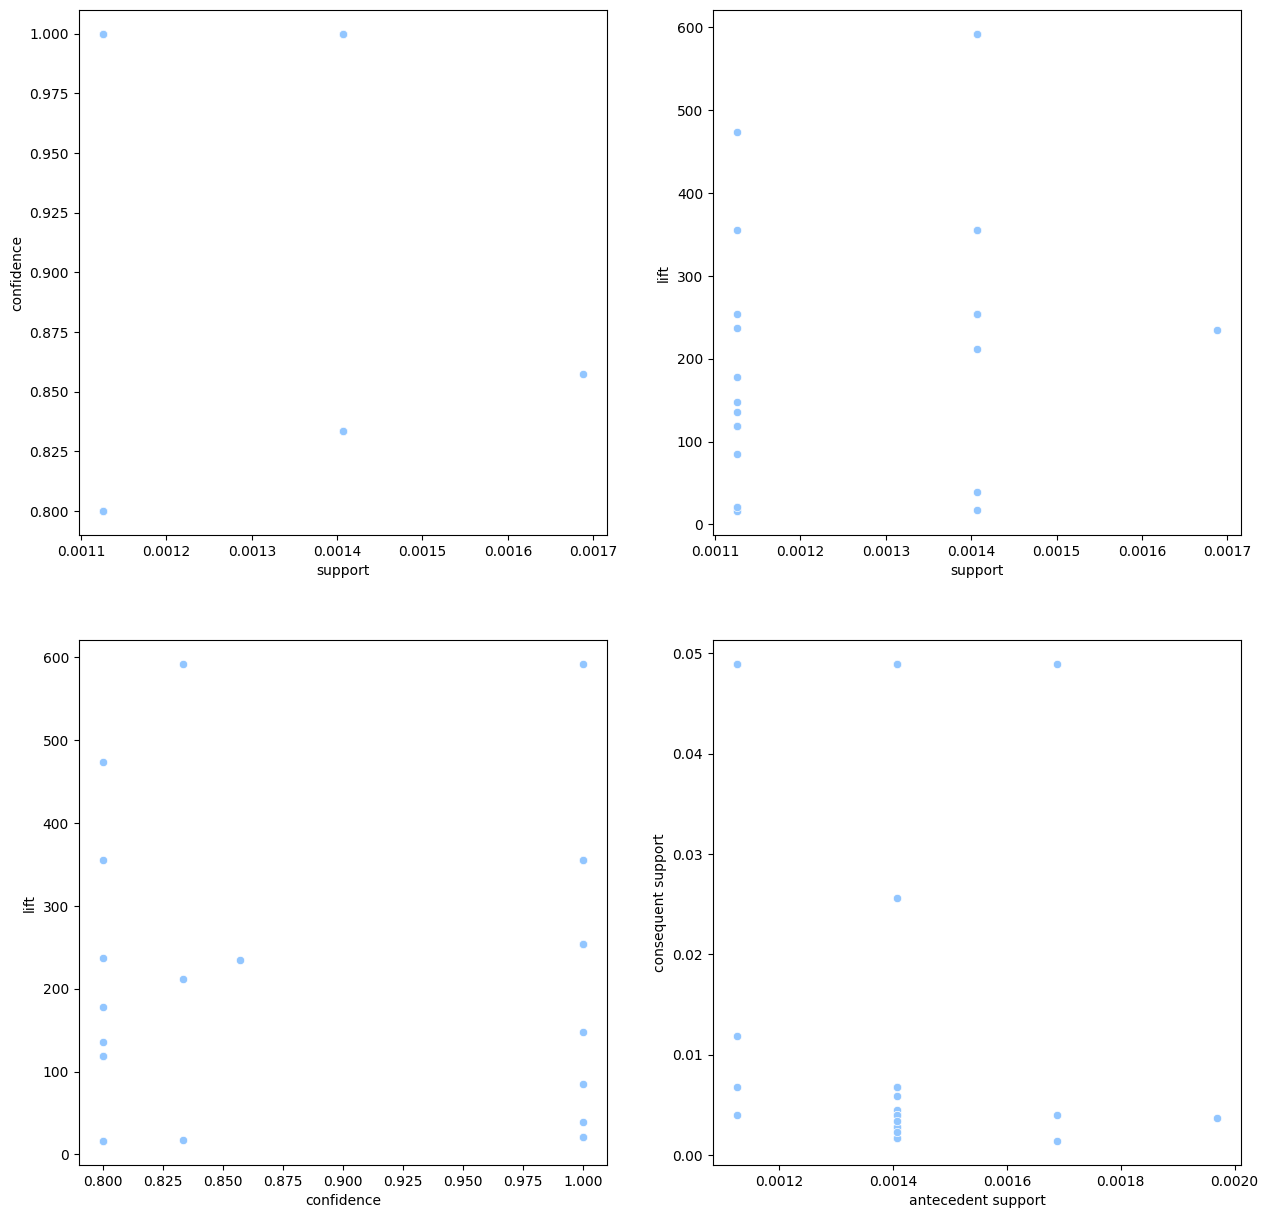

In [20]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-v0_8-pastel')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)

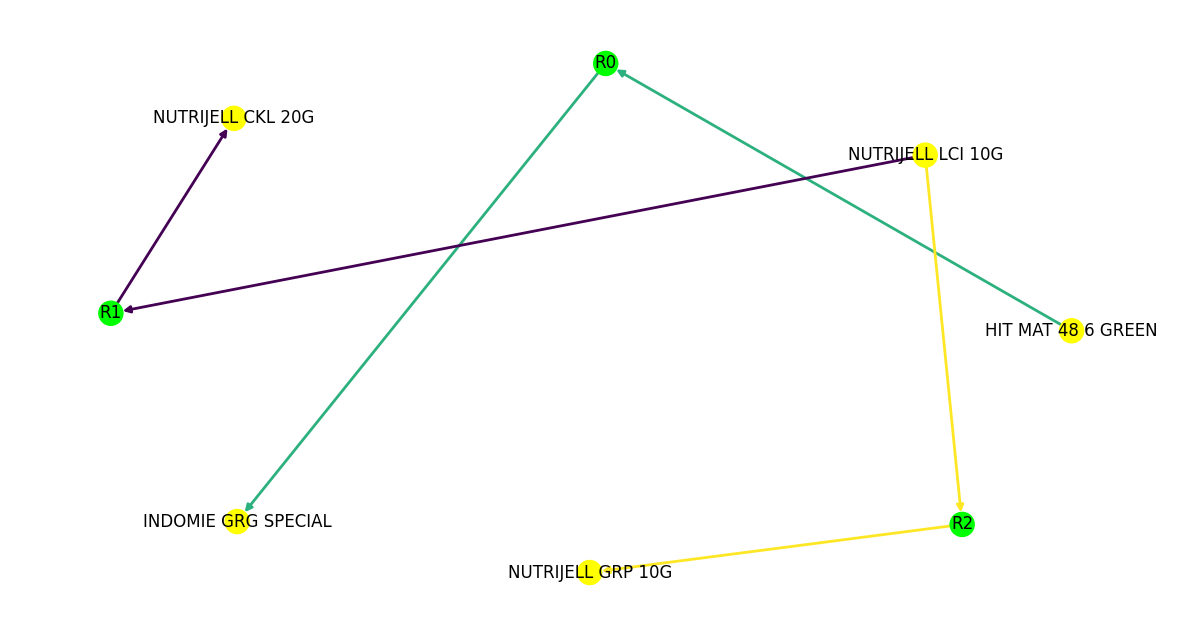

In [21]:
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50  # Membatasi jumlah warna acak
    colors = np.random.rand(N)  # Array warna acak
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']
    
    for i in range(rules_to_show):
        # Menambahkan node untuk setiap rule
        rule_node = "R" + str(i)
        G1.add_node(rule_node)
        
        # Menambahkan edges untuk antecedents (premis) -> rule
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)  # Menambahkan node antecedent
            G1.add_edge(a, rule_node, color=colors[i], weight=2)  # Menghubungkan antecedent ke rule

        # Menambahkan edges untuk rule -> consequents (konsekuen)
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)  # Menambahkan node consequent
            G1.add_edge(rule_node, c, color=colors[i], weight=2)  # Menghubungkan rule ke consequent
    
    # Menentukan warna node
    for node in G1:
        if node in strs:  # Jika node adalah rule node (misalnya R0, R1, ...)
            color_map.append('lime')
        else:  # Jika node adalah antecedent atau consequent
            color_map.append('yellow')
    
    # Menentukan warna dan bobot edge
    edges = G1.edges()
    edge_colors = [G1[u][v]['color'] for u, v in edges]
    edge_weights = [G1[u][v]['weight'] for u, v in edges]
    
    # Menata posisi node menggunakan spring_layout
    pos = nx.spring_layout(G1, k=16, seed=42)
    
    plt.figure(figsize=(15,8))
    plt.gca().set_facecolor("#F0F2F6") 

    # Menggambar graph
    nx.draw(
        G1, pos, node_color=color_map, edge_color=edge_colors, 
        width=edge_weights, font_size=16, with_labels=False
    )
    
    # Menambahkan label node (rule, antecedent, consequent)
    for p in pos:
        pos[p][1] += 0  # Mengangkat posisi label agar tidak menutupi node
    nx.draw_networkx_labels(G1, pos)
    
    # Menampilkan graph
    plt.show()

# Menjalankan fungsi dengan 10 aturan pertama
draw_graph(rules, 3)

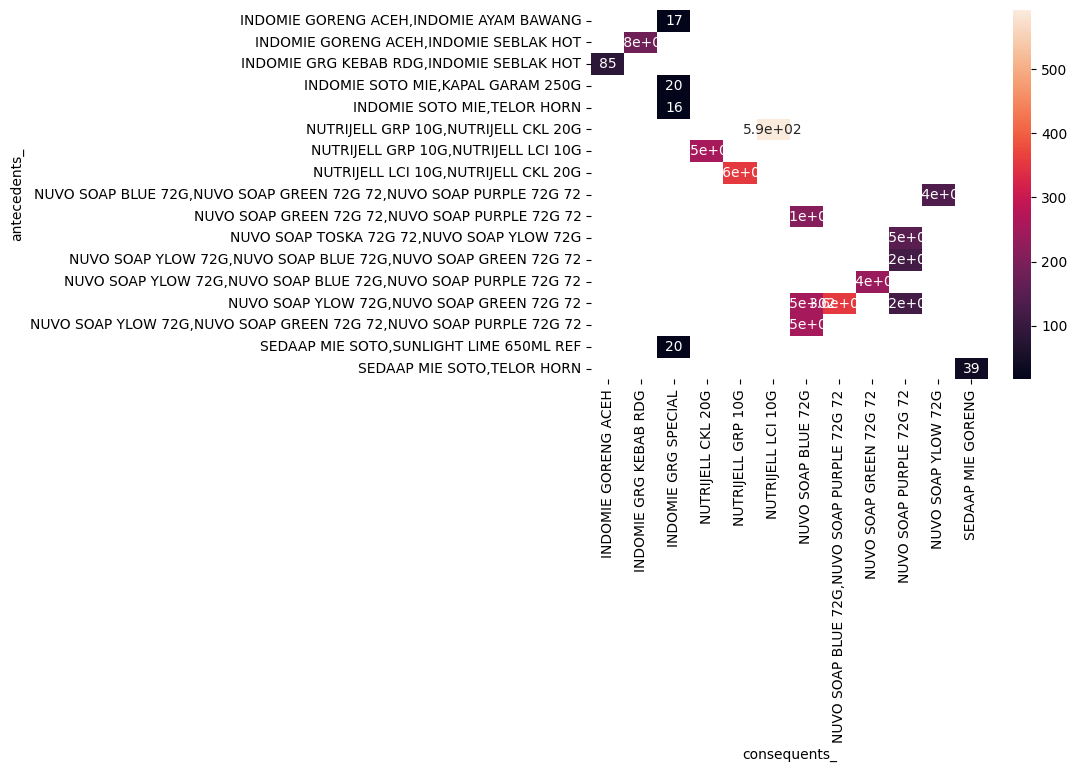

In [22]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()